In [2]:
# imports all helper classes/functions from utils.py, including other dependancies
from utils import *

In [3]:
# # Can also do "from utils_new import *" to get this class and other imports

# import numpy as np
# import math
# import random

# import matplotlib.pyplot as plt
# from matplotlib.ticker import ScalarFormatter, FuncFormatter
# from scipy.optimize import curve_fit
# from sklearn.metrics import r2_score

# class Dataset():
#     def __init__(self, filenames, apt_filename, id_filename, linker_filename):
#         '''
#         This Dataset class serves to process data for GFET data, for a single data well, including
#         multiple devices per well, over the gate voltage sweeps for multiple concentrations.
        
#         Parameters:
#             filenames: list of filenames that contains gate voltage sweeps, each for a single concentration
#             apt_filename: the filename of the voltage sweep for the devices with only the aptamer
#         Returns:
#             None

#         Format of each file:
#             First column: gate voltage
#             All other columns: Drain-Source Resistance for a single device. Each row shows the resistance
#             experienced by each device for the gate voltage of the 1st column.

#         This assumes that all of the aptamer and linker data along with ALL concentrations share the same gate voltage steps.
#         The initial dirac voltage does not have to have the same gate voltage steps.
#         '''
#         # initialize raw data and the data's basic features
#         self.num_concs = len(filenames) # number of concentrations tested
#         self.num_devices = 0 # number of devices in the well at hand, set super high to start it will get smaller later
#         self.voltages = [] # list of the voltages we sweep over
#         for conc in range(self.num_concs): # calcluate the voltages list, number of voltages, and number of devices
#             raw_data = np.loadtxt('data/'+filenames[conc])[:, [0, 1, 2, 3, 5]].T # [:, [0, 1, 2, 4]] # ONLY HERE BECAUSE WE WANT TO IGNORE FET 3
#             if len(raw_data[0,:]) > len(self.voltages): 
#                 self.voltages = raw_data[0,:] # gets the biggest list of voltages to sweep over (some stop at 1.5V and others at 1.4V, we want 1.5)
#             self.num_devices = raw_data.shape[0] - 1

#         # builds resistance info
#         self.apt_resistances = {} # dictionary of lists of aptemer resistances. {device_number: resistance_list}
#         self.id_resistances = {} # dictionary of lists of initial dirac resistances. {device_number: resistance_list}
#         self.linker_resistances = {}
#         for dev_num in range(self.num_devices):
#             raw_data_apt = np.loadtxt('data/'+apt_filename)[:, [0, 1, 2, 3, 5]].T  # ONLY HERE BECAUSE WE WANT TO IGNORE FET 4
#             raw_data_id = np.loadtxt('data/'+id_filename)[:, [0, 1, 2, 3, 5]].T  # ONLY HERE BECAUSE WE WANT TO IGNORE FET 4
#             raw_data_linker = np.loadtxt('data/'+linker_filename)[:, [0, 1, 2, 3, 5]].T  # ONLY HERE BECAUSE WE WANT TO IGNORE FET 4
#             self.apt_resistances[dev_num] = raw_data_apt[dev_num+1]
#             self.id_resistances[dev_num] = raw_data_id[dev_num+1]
#             self.id_voltages = raw_data_id[0]
#             self.linker_resistances[dev_num] = raw_data_linker[dev_num+1]
#             # self.id_voltages = raw_data_id[0]
            
#         self.resistances = {}  # dictionary of dictionary of resistance list. {concentration_num: {device_number: list_of_resistances}}
#         for conc in range(self.num_concs):
#             conc_data_dic = {}
#             for dev_num in range(self.num_devices):
#                 raw_data = np.loadtxt('data/'+filenames[conc])[:, [0, 1, 2, 3, 5]].T # [:, [0, 1, 2, 4]] # ONLY HERE BECAUSE WE WANT TO IGNORE FET 3
#                 conc_data_dic[dev_num] = raw_data[dev_num+1]
#             self.resistances[conc] = conc_data_dic

#         # builds resistance derivative info
#         self.resistance_derivatives = {} # dictionary of dictionary of delta resistance list. {concentration_num: {device_number: list_of_resistance_changes}}
#         for conc in range(self.num_concs):
#             conc_resistance_derivative = {}
#             for dev_num in range(self.num_devices): 
#                 conc_resistance_derivative[dev_num] = [self.resistances[conc][dev_num][i] - self.resistances[conc][dev_num][i+1] for i in range(len(self.resistances[conc][dev_num])-1)]
#             self.resistance_derivatives[conc] = conc_resistance_derivative
#         self.apt_resistance_derivatives = {} # dictionary of lists of aptemer delta resistance. {device_number: list_of_resistance_changes}
#         self.id_resistance_derivatives = {} # dictionary that has the same structure as apt_resistance_derivatives, but for initial dirac sweep
#         self.linker_resistance_derivatives = {}
#         for dev_num in range(self.num_devices): 
#             self.apt_resistance_derivatives[dev_num] = [self.apt_resistances[dev_num][i] - self.apt_resistances[dev_num][i+1] for i in range(len(self.apt_resistances[dev_num])-1)]
#             self.id_resistance_derivatives[dev_num] = [self.id_resistances[dev_num][i] - self.id_resistances[dev_num][i+1] for i in range(len(self.id_resistances[dev_num])-1)]
#             self.linker_resistance_derivatives[dev_num] = [self.linker_resistances[dev_num][i] - self.linker_resistances[dev_num][i+1] for i in range(len(self.linker_resistances[dev_num])-1)]

        
#         # builds dirac voltage info
#         self.apt_dirac_voltages = {} # dictionary of lists for dirac voltages for the aptemer. The list enumerates the concentrations. {device_number: dirac_voltage_list}
#         self.id_dirac_voltages = {} # dictionary that has the same structure as apt_dirac_voltages, but for initial dirac sweep
#         self.linker_dirac_voltages = {}
#         for dev_num in range(self.num_devices):
#             self.apt_dirac_voltages[dev_num] = self.voltages[np.argmax(self.apt_resistances[dev_num])]
#             self.id_dirac_voltages[dev_num] = self.id_voltages[np.argmax(self.id_resistances[dev_num])]
#             self.linker_dirac_voltages[dev_num] = self.voltages[np.argmax(self.linker_resistances[dev_num])]
#         self.dirac_voltages = np.zeros((self.num_concs, self.num_devices)) # 2D array of dirac voltages. x:concentration, y: device_number
#         self.adj_dirac_voltages = np.zeros((self.num_concs, self.num_devices)) # 2D array of dirac voltage shifts (adjusted). x:concentration, y: device_number
#         for conc in range(self.num_concs):
#             for dev_num in range(self.num_devices):
#                 self.dirac_voltages[conc,dev_num] = self.voltages[np.argmax(self.resistances[conc][dev_num])]
#                 self.adj_dirac_voltages[conc,dev_num] = self.voltages[np.argmax(self.resistances[conc][dev_num])] - self.apt_dirac_voltages[dev_num]

#         # builds info about transconductance voltages, both pos and neg
#         self.apt_pos_transc_voltages = {} # dictionary of lists for positive transconductance voltages for the aptemer. The list enumerates the concentrations. {device_number: pos_transc_v_list}
#         self.apt_neg_transc_voltages = {}# dictionary of lists for negative transconductance voltages for the aptemer. The list enumerates the concentrations. {device_number: neg_transc_v_list}
#         for dev_num in range(self.num_devices):
#                 self.apt_pos_transc_voltages[dev_num] = self.voltages[np.argmax(self.apt_resistance_derivatives[dev_num])]
#                 self.apt_neg_transc_voltages[dev_num] = self.voltages[np.argmin(self.apt_resistance_derivatives[dev_num])]
#         self.pos_transc_voltages = np.zeros((self.num_concs, self.num_devices)) # 2D array of positive transconductance voltages. x:concentration, y: device_number
#         self.neg_transc_voltages = np.zeros((self.num_concs, self.num_devices)) # 2D array of negative transconductance voltages. x:concentration, y: device_number
#         self.adj_pos_transc_voltages = np.zeros((self.num_concs, self.num_devices)) # 2D array of positive transconductance voltage shifts (adjusted). x:concentration, y: device_number
#         self.adj_neg_transc_voltages = np.zeros((self.num_concs, self.num_devices)) # 2D array of negative transconductance voltage shifts (adjusted). x:concentration, y: device_number
#         for conc in range(self.num_concs):
#             for dev_num in range(self.num_devices):
#                 self.pos_transc_voltages[conc, dev_num] = self.voltages[np.argmax(self.resistance_derivatives[conc][dev_num])]
#                 self.neg_transc_voltages[conc, dev_num] = self.voltages[np.argmin(self.resistance_derivatives[conc][dev_num])]
#                 self.adj_pos_transc_voltages[conc, dev_num] = self.voltages[np.argmax(self.resistance_derivatives[conc][dev_num])] - self.apt_pos_transc_voltages[dev_num]
#                 self.adj_neg_transc_voltages[conc, dev_num] = self.voltages[np.argmin(self.resistance_derivatives[conc][dev_num])] - self.apt_neg_transc_voltages[dev_num]

#         # builds info about conductances
#         self.apt_conductances = {dev_num: 1/self.apt_resistances[dev_num] for dev_num in range(self.num_devices)} # dictionary of lists of conductances for the aptamer readings. {device_number: conductance_list}
#         self.id_conductances = {dev_num: 1/self.id_resistances[dev_num] for dev_num in range(self.num_devices)} # dictionary that has the same structure as apt_conductances, but for initial dirac sweep
#         self.linker_conductances = {dev_num: 1/self.linker_resistances[dev_num] for dev_num in range(self.num_devices)}
#         self.conductances = {} # dictionary of dictionaries of lists for conductance readings. {concentration: {device_number: conductance_list}}
#         for conc in range(self.num_concs):
#             self.conductances[conc] = [1 / self.resistances[conc][dev_num] for dev_num in range(self.num_devices)]

#         # builds info about conductance derivatives
#         self.conductance_derivatives = {} # dictionary of dictionary of delta conductance list. {concentration_num: {device_number: list_of_conductance_changes}}
#         for conc in range(self.num_concs):
#             conc_conductance_derivative = {}
#             for dev_num in range(self.num_devices): 
#                 conc_conductance_derivative[dev_num] = [self.conductances[conc][dev_num][i] - self.conductances[conc][dev_num][i+1] for i in range(len(self.conductances[conc][dev_num])-1)]
#             self.conductance_derivatives[conc] = conc_conductance_derivative
#         self.apt_conductance_derivatives = {} # dictionary of lists of aptemer delta conductance. {device_number: list_of_conductance_changes}
#         self.id_conductance_derivatives = {} # dictionary that has the same structure as apt_conductance_derivatives, but for initial dirac sweep
#         self.linker_conductance_derivatives = {}
#         for dev_num in range(self.num_devices): 
#             self.apt_conductance_derivatives[dev_num] = [self.apt_conductances[dev_num][i] - self.apt_conductances[dev_num][i+1] for i in range(len(self.apt_conductances[dev_num])-1)]
#             self.id_conductance_derivatives[dev_num] = [self.id_conductances[dev_num][i] - self.id_conductances[dev_num][i+1] for i in range(len(self.id_conductances[dev_num])-1)]
#             self.linker_conductance_derivatives[dev_num] = [self.linker_conductances[dev_num][i] - self.linker_conductances[dev_num][i+1] for i in range(len(self.linker_conductances[dev_num])-1)]

        
#     def conductance_shifts(self, voltage_to_track):
#         '''
#         Calculates the conductance shift over different concentrations, for a static gate voltage.

#         Returns:
#             2D array of conductance shifts, x: concentration, y: device_number
#         Paramerers:
#             voltage_to_track: gate voltage to fix, must be in the list self.voltages
#         '''
#         voltage_idx = np.abs(self.voltages - voltage_to_track).argmin() # index of voltage we want to track in self.voltages. The voltage can be an average of others so it may not be on the list

#         # builds the 2D array of conductances at a voltage
#         conductance_at_voltage = np.zeros((self.num_concs, self.num_devices)) # 2D array of conductances. x:concentration, y: device_number
#         for conc in range(self.num_concs):
#             for dev_num in range(self.num_devices):
#                 conductance_at_voltage[conc, dev_num] = self.conductances[conc][dev_num][voltage_idx]

#         # builds the 2D array of the change in conductances at a voltage. This change is with respect to the aptamer conductance
#         delta_conductance = np.zeros((self.num_concs, self.num_devices)) # 2D list tracking the change in conductances. x:concentration, y: device_number
#         for dev_num in range(self.num_devices):
#             delta_conductance[:,dev_num] = conductance_at_voltage[:,dev_num] - self.apt_conductances[dev_num][voltage_idx]

#         return delta_conductance

    
#     def normalize_2D_array(self, delta_Y, Y_0):
#         Y_norm = np.zeros((self.num_concs, self.num_devices))
#         for dev_num in range(self.num_devices):
#             # G_norm[:,dev_num] = (G_0[dev_num] - delta_G[:,dev_num]) / G_0[dev_num]
#             Y_norm[:,dev_num] = (delta_Y[:,dev_num] - Y_0[dev_num]) / Y_0[dev_num] + 1
#         return Y_norm

    
#     def normalized_conductance_shifts(self, voltage_to_track):
#         '''
#         Calculates the normalized conductance shift over different concentrations, for a specific gate voltage.
#         Normalization strategy is
#                 (I_0-I) / I_0 , 
#         where I_0 is the aptamer coductance

#         Returns:
#             2D array of normalized conductance shifts, x: concentration, y: device_number
#         Paramerers:
#             voltage_to_track: gate voltage to fix, must be in the list self.voltages
        
#         '''
#         delta_G = self.conductance_shifts(voltage_to_track) # un-normalized conductance shift

#         voltage_idx = np.abs(self.voltages - voltage_to_track).argmin() # index of voltage we want to track in self.voltages

#         # builds G_0 list
#         G_0 = {} # aptamer conductance, 
#         for dev_num in range(self.num_devices):
#             G_0[dev_num] = self.apt_conductances[dev_num][voltage_idx]

#         # # builds G_norm array
#         # G_norm = np.zeros((self.num_concs, self.num_devices))
#         # for dev_num in range(self.num_devices):
#         #     # G_norm[:,dev_num] = (G_0[dev_num] - delta_G[:,dev_num]) / G_0[dev_num]
#         #     G_norm[:,dev_num] = (delta_G[:,dev_num] - G_0[dev_num]) / G_0[dev_num]

#         # return G_norm
#         return self.normalize_2D_array(delta_G, G_0)

#     def analysis(self, data_array_2D):
#         '''
#         Performs curve fitting of a data array vs concentration. For example, Dirac Voltage vs concentration, or conductance vs concentration.

#         Returns:
#             concentrations_list: The list of concentrations that corresponds to the data_array_flattened list. Neeed because the data_array_2D was flattened
#             data_array_flattened: The flattened list from data_array_2D, needed because pyplot cannot plot 2D matrices.
#             hill_coeffs = (A, K, n, b): Coefficients for hill curve fitted to distribution
#             std_devs: The list, as long as the number of concentrations, for the standard deviations at each concentration
#             S: sensitivity
#             LOD: Limit of detection
#             r2: r^2 value on how the hill curve fits the points
#         Parameters:
#             data_array_2D: 2D array of data we want to use. Must have x: concentration, y: device_number
#         '''
#         concentrations_list = np.repeat(range(self.num_concs), self.num_devices) # The list of concentrations that corresponds to the data_array_flattened list. Neeed because the data_array_2D is flattened
#         data_array_flattened = data_array_2D.flatten() # The flattened list from data_array_2D, needed because pyplot cannot plot 2D matrices.
#         hill_coeffs, c = curve_fit(hill_function, concentrations_list, data_array_flattened) # fits the datapoints to hill_function, the hill curve
#         std_devs = [] # calculates the standard deviation for each concentration
#         for i in range(self.num_concs):
#             mu = hill_function(i, *hill_coeffs)
#             val = np.sqrt(1/self.num_devices * sum([(mu - x_j)**2 for x_j in data_array_flattened[i*self.num_devices:i*(self.num_devices+1)]]))
#             std_devs.append(val)
            
#         # calculates slope, which is needed for LOD
#         inf_point_x = inflection_point_hill_function(*hill_coeffs)
#         S = derivative_hill_function(inf_point_x, *hill_coeffs)
#         # print('inf point', inf_point_x)

#         # calculates standard deviation at low concentration, which is needed for lOD 
#         conc_to_take_std_dev = 3
#         std_dev = np.std(data_array_flattened[conc_to_take_std_dev*self.num_devices:conc_to_take_std_dev*(self.num_devices+1)])

#         # caluclates and prints LOD, LOQ, and dynamic range
#         LOD = 3.3 * std_dev / S
#         LOQ = 10 * std_dev / S
#         # print(f'sensitivity: {S}') # :.4f}')
#         print(f'LOD: {LOD} for decade, but for real:', str(10**(-18 + LOD)))
#         # print(f'Theoetical dynamic range: {LOD} to {999999}')
#         # print(f'Experimental dynamic range: {LOD} to 10^-9')
#         # print(f'LOQ: {LOQ}')
#         # print(f'Dynamic range: {LOD} to {LOQ}')

#         # calculates r^2
#         predicted_data = [hill_function(conc, *hill_coeffs) for conc in concentrations_list]
#         r2 = r2_score(data_array_flattened, predicted_data)

#         # calculates r^2 for only the linear region, 10^-18 - 10^-14
#         predicted_data_linear = [hill_function(conc, *hill_coeffs) for conc in concentrations_list[:self.num_devices*5]]
#         data_array_flattened_linear = data_array_flattened[:self.num_devices*5]
#         r2_linear = r2_score(data_array_flattened_linear, predicted_data_linear)
        
#         return concentrations_list, data_array_flattened, hill_coeffs, std_devs, S, LOD, r2, r2_linear


#     def sweep_dirac_analysis(self):
#         '''
#         Analysis for dirac voltage shift
#         '''
#         return self.analysis(self.adj_dirac_voltages)

#     def sweep_dirac_analysis_normalized(self):
#         '''
#         Analysis for normalized dirac voltage shift
#         '''
#         return self.analysis(self.normalize_2D_array(self.adj_dirac_voltages, self.apt_dirac_voltages))

#     def sweep_pos_transconductance_analysis(self):
#         return self.analysis(self.adj_pos_transc_voltages)

#     def sweep_pos_transconductance_analysis_normalized(self):
#         return self.analysis(self.normalize_2D_array(self.adj_pos_transc_voltages, self.apt_pos_transc_voltages))

#     def sweep_neg_transconductance_analysis(self):
#         return self.analysis(self.adj_neg_transc_voltages)

#     def sweep_neg_transconductance_analysis_normalized(self):
#         return self.analysis(self.normalize_2D_array(self.adj_neg_transc_voltages, self.apt_neg_transc_voltages))
        
#     def static_dirac_analysis(self):
#         avg_apt_dirac_voltage = np.mean(list(self.apt_dirac_voltages.values()))   
#         return self.analysis(self.conductance_shifts(avg_apt_dirac_voltage))

#     def static_dirac_analysis_normalized(self):
#         avg_apt_dirac_voltage = np.mean(list(self.apt_dirac_voltages.values()))   
#         return self.analysis(self.normalized_conductance_shifts(avg_apt_dirac_voltage))
    
#     def static_pos_transc_conduc_analysis(self):
#         '''
#         Analysis for transconductance conductance, at the mean of the positive aptamer transconductance point
#         '''
#         avg_pos_apt_transc_voltage = np.mean(list(self.apt_pos_transc_voltages.values()))        
#         return self.analysis(self.conductance_shifts(avg_pos_apt_transc_voltage))

#     def static_pos_transc_conduc_analysis_normalized(self):
#         '''
#         Analysis for normalzied transconductance conductance, at the mean of the positive aptamer transconductance point
#         '''
#         avg_pos_apt_transc_voltage = np.mean(list(self.apt_pos_transc_voltages.values()))
#         return self.analysis(self.normalized_conductance_shifts(avg_pos_apt_transc_voltage))
        
#     def static_neg_transc_conduc_analysis(self):
#         '''
#         Analysis for transconductance conductance, at the mean of the negative aptamer transconductance point
#         '''
#         avg_neg_apt_transc_voltage = np.mean(list(self.apt_neg_transc_voltages.values()))        
#         return self.analysis(self.conductance_shifts(avg_neg_apt_transc_voltage))

#     def static_neg_transc_conduc_analysis_normalized(self):
#         '''
#         Analysis for normalized transconductance conductance, at the mean of the negative aptamer transconductance point
#         '''
#         avg_neg_apt_transc_voltage = np.mean(list(self.apt_neg_transc_voltages.values()))
#         return self.analysis(self.normalized_conductance_shifts(avg_neg_apt_transc_voltage))

# def hill_function(x, A, K, n, b):
#     '''
#     Hill curve
#     Returns the value at input x, given coefficients
#     '''
#     # if K < 0: K=random.uniform(0, 5) # setting arbitrary K value if K<0 because this throws error. Done because polyfit
#     return A * (x**n) / (K**n + x**n) + b

# def derivative_hill_function(x, A, K, n, b):
#     '''
#     Derivative of the hill curve
#     Returns the value at input x, given coefficients
#     '''
#     return A * n * K**n * (x**(n-1)) / (K**n + x**n)**2

# def inflection_point_hill_function(A, K, n, b):
#     '''
#     The inflection point of the hill curve
#     Returns the inflection point, given coefficients
#     '''
#     return K* ((n-1)/(n+1))**(1/n)

# def format_with_e(x, pos):
#     '''
#     Used in pyplot, for formatting the y-axis so that the numbers use e notation, not leading 0's or e's above the y-axis
#     '''
#     return f'{x:.1e}' if not x==0 else 0
            
        

    

C:\Users\joeyl\Downloads\GFET-covid-flu\utils.py:321: RuntimeWarning: invalid value encountered in scalar power
  return A * (x**n) / (K**n + x**n) + b


LOD: 0.501362053691213 for decade, but for real: 3.172210904567099e-18
S: 0.062056348587103696
LOD: 0.501362053691213
r2: 0.958586263143741
r2 linear: 0.9803517534484532


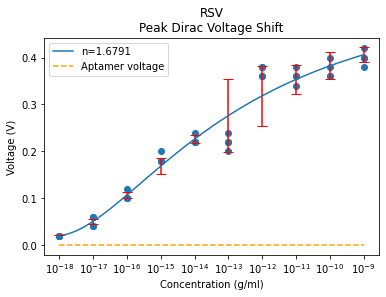

C:\Users\joeyl\Downloads\GFET-covid-flu\utils.py:321: RuntimeWarning: invalid value encountered in scalar power
  return A * (x**n) / (K**n + x**n) + b


LOD: 0.34627964153965735 for decade, but for real: 2.219625172952459e-18
S: 0.07218921196202781
LOD: 0.34627964153965735
r2: 0.9598770334904541
r2 linear: 0.9838235815236633


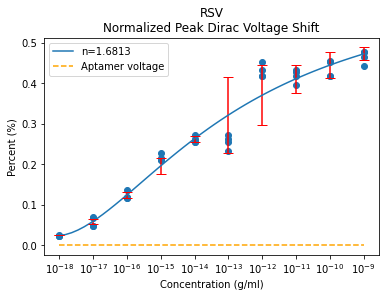

C:\Users\joeyl\Downloads\GFET-covid-flu\utils.py:321: RuntimeWarning: invalid value encountered in scalar power
  return A * (x**n) / (K**n + x**n) + b


LOD: 1.2914004584749084 for decade, but for real: 1.956142363180011e-17
S: 0.06374201121644239
LOD: 1.2914004584749084
r2: 0.9408514927409427
r2 linear: 0.8487863419743011


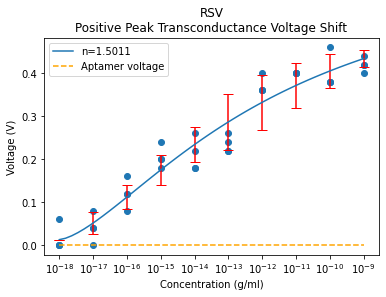

C:\Users\joeyl\Downloads\GFET-covid-flu\utils.py:321: RuntimeWarning: invalid value encountered in scalar power
  return A * (x**n) / (K**n + x**n) + b


LOD: 1.291388052897971 for decade, but for real: 1.956086486973878e-17
S: 0.06928546037722245
LOD: 1.291388052897971
r2: 0.9408514927362782
r2 linear: 0.8487856600968074


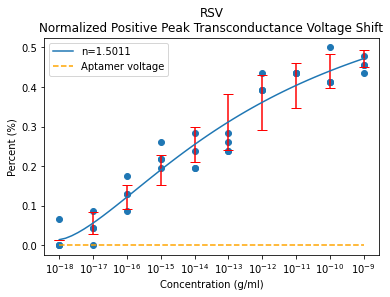

LOD: 1.0707380278578085 for decade, but for real: 1.1768958403151524e-17
S: 0.05811449217780058
LOD: 1.0707380278578085
r2: 0.6444874001776075
r2 linear: 0.9272516599831413


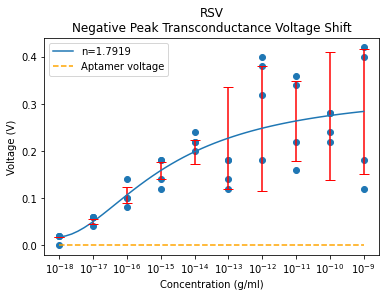

LOD: 1.3050883023518756 for decade, but for real: 2.0187767870793942e-17
S: 0.0759957459379197
LOD: 1.3050883023518756
r2: 0.6379653631274264
r2 linear: 0.9104022949368235


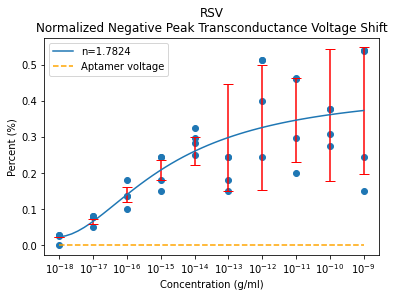

LOD: 0.3701901360940545 for decade, but for real: 2.3452553540235077e-18
S: 4.633988502264243e-05
LOD: 0.3701901360940545
r2: 0.8815606843121894
r2 linear: 0.9397206337216406


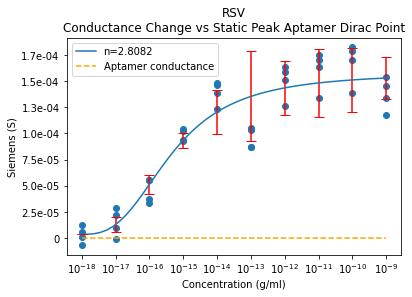

LOD: 1.7497887715065406 for decade, but for real: 5.620678848535687e-17
S: 0.17576807364183386
LOD: 1.7497887715065406
r2: 0.7349002385910983
r2 linear: 0.8342725870457667


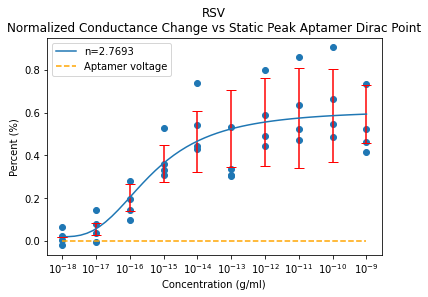

LOD: 2.5650451992011503 for decade, but for real: 3.673205273951991e-16
S: 3.0024506414532297e-05
LOD: 2.5650451992011503
r2: 0.7811365747939181
r2 linear: 0.6955793367515715


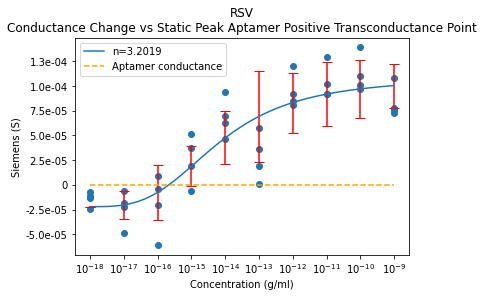

C:\Users\joeyl\Downloads\GFET-covid-flu\utils.py:321: RuntimeWarning: invalid value encountered in scalar power
  return A * (x**n) / (K**n + x**n) + b


LOD: 3.353401249737004 for decade, but for real: 2.256322892471768e-15
S: 0.10735265946428812
LOD: 3.353401249737004
r2: 0.6372138110938308
r2 linear: 0.6522836392262062


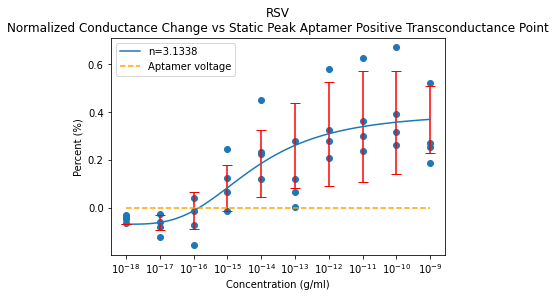

LOD: 0.8725461590782554 for decade, but for real: 7.456691214119888e-18
S: 4.1585102751511187e-05
LOD: 0.8725461590782554
r2: 0.7053136786291933
r2 linear: 0.8279111168572809


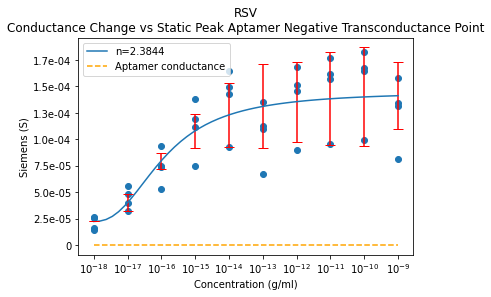

LOD: 0.6519802695533158 for decade, but for real: 4.4872500342987105e-18
S: 0.1323598365370071
LOD: 0.6519802695533158
r2: 0.6289512580758443
r2 linear: 0.773079780126426


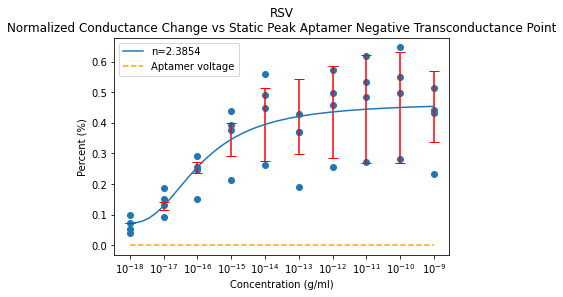

In [4]:
# for RSV, well 3

# filenames to inlude for each concentration
filenames = ['BCdata_B48C13_rsv_1ag.txt', 
             'BCdata_B48C13_rsv_10ag.txt', 
             'BCdata_B48C13_rsv_100ag.txt', 
             'BCdata_B48C13_rsv_1fg.txt', 
             'BCdata_B48C13_rsv_10fg.txt', 
             'BCdata_B48C13_rsv_100fg.txt', 
             'BCdata_B48C13_rsv_1pg.txt', 
             'BCdata_B48C13_rsv_10pg.txt', 
             'BCdata_B48C13_rsv_100pg.txt', 
             'BCdata_B48C13_rsv_1ng.txt']

filename_aptamer = 'BCdata_B48C13_rsv_aptamers.txt'
filename_id = 'BCdata_B48C13_rsv_initialDirac.txt'
filename_linker = 'BCdata_B48C13_rsv_linker.txt'

dataset = Dataset(filenames, filename_aptamer, filename_id, filename_linker)


# Dirac vaoltage sweep
concs, dirac, dirac_coeffs, std_devs, S, LOD, r2, r2_linear = dataset.sweep_dirac_analysis()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, dirac, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *dirac_coeffs)
plt.plot(X_fit, Y_fit, label=f'n={dirac_coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer voltage')
plt.legend()
plt.title('RSV\nPeak Dirac Voltage Shift')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Voltage (V)') # "Dirac Shift (V)")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *dirac_coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()


concs, dirac, dirac_coeffs, std_devs, S, LOD, r2, r2_linear = dataset.sweep_dirac_analysis_normalized()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, dirac, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *dirac_coeffs)
plt.plot(X_fit, Y_fit, label=f'n={dirac_coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer voltage')
plt.legend()
plt.title('RSV\nNormalized Peak Dirac Voltage Shift')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Percent (%)') # " Normalized Dirac Shift")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *dirac_coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()

# pos trasconductance voltage sweep
concs, values, coeffs, std_devs, S, LOD, r2, r2_linear = dataset.sweep_pos_transconductance_analysis()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, values, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *coeffs)
plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer voltage')
plt.legend()
plt.title('RSV\nPositive Peak Transconductance Voltage Shift')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Voltage (V)') # "Pos Transconductance Voltage Shift (V)")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()

concs, values, coeffs, std_devs, S, LOD, r2, r2_linear = dataset.sweep_pos_transconductance_analysis_normalized()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, values, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *coeffs)
plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer voltage')
plt.legend()
plt.title('RSV\nNormalized Positive Peak Transconductance Voltage Shift')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Percent (%)') # "Pos Transconductance Normalized Voltage Shift (V)")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()

# neg trasconductance voltage sweep
concs, values, coeffs, std_devs, S, LOD, r2, r2_linear = dataset.sweep_neg_transconductance_analysis()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, values, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *coeffs)
plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer voltage')
plt.legend()
plt.title('RSV\nNegative Peak Transconductance Voltage Shift')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Voltage (V)') # "Neg Transconductance Voltage Shift (V)")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()

concs, values, coeffs, std_devs, S, LOD, r2, r2_linear = dataset.sweep_neg_transconductance_analysis_normalized()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, values, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *coeffs)
plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer voltage')
plt.legend()
plt.title('RSV\nNormalized Negative Peak Transconductance Voltage Shift')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Percent (%)') # "Neg Transconductance Normalized Voltage Shift (V)")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()


# dirac conductance static
concs, values, coeffs, std_devs, S, LOD, r2, r2_linear = dataset.static_dirac_analysis()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, values, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *coeffs)
plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer conductance')
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_e))
plt.title('RSV\nConductance Change vs Static Peak Aptamer Dirac Point')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Siemens (S)') # "Static Dirac Conductance Shift (S)")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()

concs, values, coeffs, std_devs, S, LOD, r2, r2_linear = dataset.static_dirac_analysis_normalized()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, values, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *coeffs)
plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer voltage')
plt.legend()
# plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_e))
plt.title('RSV\nNormalized Conductance Change vs Static Peak Aptamer Dirac Point')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Percent (%)') # "Static Normalized Dirac Conductance Shift (S)")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()

# pos transconductance static
concs, pos_transc_conduc, pos_transc_conduc_coeffs, std_devs, S, LOD, r2, r2_linear = dataset.static_pos_transc_conduc_analysis()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, pos_transc_conduc, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *pos_transc_conduc_coeffs)
plt.plot(X_fit, Y_fit, label=f'n={pos_transc_conduc_coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer conductance')
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_e))
plt.title('RSV\nConductance Change vs Static Peak Aptamer Positive Transconductance Point')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Siemens (S)') # " Pos Transconductance Shift (S)")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *pos_transc_conduc_coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()

concs, pos_transc_conduc, pos_transc_conduc_coeffs, std_devs, S, LOD, r2, r2_linear = dataset.static_pos_transc_conduc_analysis_normalized()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, pos_transc_conduc, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *pos_transc_conduc_coeffs)
plt.plot(X_fit, Y_fit, label=f'n={pos_transc_conduc_coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer voltage')
plt.legend()
plt.title('RSV\nNormalized Conductance Change vs Static Peak Aptamer Positive Transconductance Point')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Percent (%)') # "Normalized Pos Transconductance Shift")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *pos_transc_conduc_coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()


# neg transconductance static
concs, neg_transc_conduc, neg_transc_conduc_coeffs, std_devs, S, LOD, r2, r2_linear = dataset.static_neg_transc_conduc_analysis()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, neg_transc_conduc, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *neg_transc_conduc_coeffs)
plt.plot(X_fit, Y_fit, label=f'n={neg_transc_conduc_coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer conductance')
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_e))
plt.title('RSV\nConductance Change vs Static Peak Aptamer Negative Transconductance Point')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Siemens (S)') # "Neg Transconductance Shift (S)")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *neg_transc_conduc_coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()

concs, neg_transc_conduc, neg_transc_conduc_coeffs, std_devs, S, LOD, r2, r2_linear = dataset.static_neg_transc_conduc_analysis_normalized()
print(f'S: {S}')
print(f'LOD: {LOD}')
print(f'r2: {r2}')
print(f'r2 linear: {r2_linear}')
plt.scatter(concs, neg_transc_conduc, marker='o')
X_fit = np.linspace(min(concs), max(concs), 50)
Y_fit = hill_function(X_fit, *neg_transc_conduc_coeffs)
plt.plot(X_fit, Y_fit, label=f'n={neg_transc_conduc_coeffs[2]:.4f}')
plt.plot([0,9], [0,0], color='orange', linestyle='--', label='Aptamer voltage')
plt.legend()
plt.title('RSV\nNormalized Conductance Change vs Static Peak Aptamer Negative Transconductance Point')
plt.xlabel("Concentration (g/ml)")
plt.ylabel('Percent (%)') # "Normalized Neg Transconductance Shift")
plt.errorbar(range(dataset.num_concs), hill_function(range(dataset.num_concs), *neg_transc_conduc_coeffs), yerr=std_devs, ecolor='red', fmt='None', capsize=5)
x_labels = [f"$10^{{{i}}}$" for i in np.array(range(dataset.num_concs))-18]
plt.xticks(range(dataset.num_concs), x_labels)
plt.show()
plt.close()

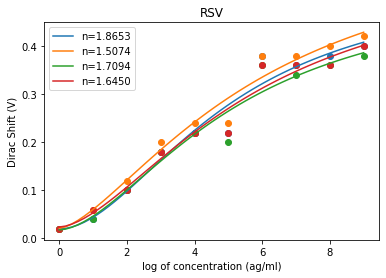

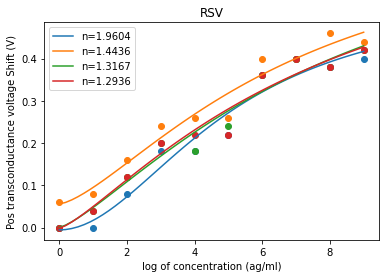

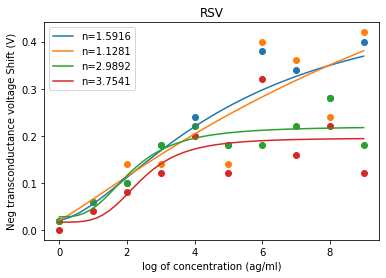

In [301]:
# dirac voltage shifts
for i in range(dataset.num_devices):
    concs = range(dataset.num_concs)
    dirac_voltages = dataset.adj_dirac_voltages[:,i]
    plt.scatter(concs, dirac_voltages, marker='o')
    coeffs, pcov = curve_fit(hill_function, concs, dirac_voltages)
    X_fit = np.linspace(min(concs), max(concs), 50)
    Y_fit = hill_function(X_fit, *coeffs)
    plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.legend()
plt.title('RSV')
plt.xlabel("log of concentration (ag/ml)")
plt.ylabel("Dirac Shift (V)")
plt.show()
plt.close()


# pos transconductance voltage shifts
for i in range(dataset.num_devices):
    concs = range(dataset.num_concs)
    pos_transc_voltages = dataset.adj_pos_transc_voltages[:,i]
    plt.scatter(concs, pos_transc_voltages, marker='o')
    coeffs, pcov = curve_fit(hill_function, concs, pos_transc_voltages)
    X_fit = np.linspace(min(concs), max(concs), 50)
    Y_fit = hill_function(X_fit, *coeffs)
    plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.title('RSV')
plt.xlabel("log of concentration (ag/ml)")
plt.ylabel("Pos transconductance voltage Shift (V)")
plt.legend()
plt.show()
plt.close()

# neg transconductance voltage shifts
for i in range(dataset.num_devices):
    concs = range(dataset.num_concs)
    neg_transc_voltages = dataset.adj_neg_transc_voltages[:,i]
    plt.scatter(concs, neg_transc_voltages, marker='o')
    coeffs, pcov = curve_fit(hill_function, concs, neg_transc_voltages)
    X_fit = np.linspace(min(concs), max(concs), 50)
    Y_fit = hill_function(X_fit, *coeffs)
    plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.title('RSV')
plt.xlabel("log of concentration (ag/ml)")
plt.ylabel("Neg transconductance voltage Shift (V)")
plt.legend()
plt.show()
plt.close()

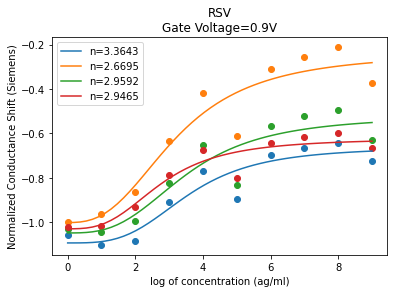

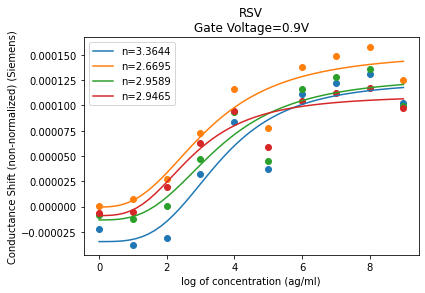

In [304]:
# conductance shifts at Gate voltage 0.9
for i in range(dataset.num_devices):
    concs = range(dataset.num_concs)
    conductances = dataset.normalized_conductance_shifts(0.9)[:,i]
    plt.scatter(concs, conductances, marker='o')
    coeffs, pcov = curve_fit(hill_function, concs, conductances)
    X_fit = np.linspace(min(concs), max(concs), 50)
    Y_fit = hill_function(X_fit, *coeffs)
    plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.legend()
plt.title('RSV\nGate Voltage=0.9V')
plt.xlabel("log of concentration (ag/ml)")
plt.ylabel("Normalized Conductance Shift (Siemens)")
plt.show()
plt.close()

# conductance shifts at Gate voltage 0.9
for i in range(dataset.num_devices):
    concs = range(dataset.num_concs)
    conductances = dataset.conductance_shifts(0.9)[:,i]
    plt.scatter(concs, conductances, marker='o')
    coeffs, pcov = curve_fit(hill_function, concs, conductances)
    X_fit = np.linspace(min(concs), max(concs), 50)
    Y_fit = hill_function(X_fit, *coeffs)
    plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.legend()
plt.title('RSV\nGate Voltage=0.9V')
plt.xlabel("log of concentration (ag/ml)")
plt.ylabel("Conductance Shift (non-normalized) (Siemens)")
plt.show()
plt.close()

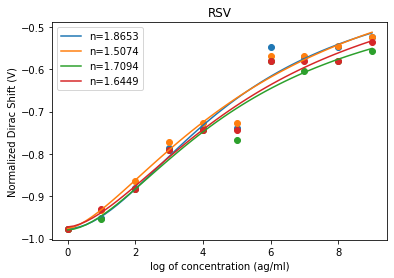

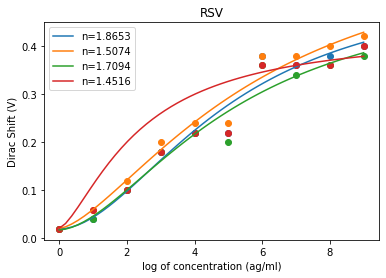

In [305]:
# normalized dirac voltage shifts
for i in range(dataset.num_devices):
    concs = range(dataset.num_concs)
    dirac_voltages = dataset.norm_dirac_voltages[:,i]
    plt.scatter(concs, dirac_voltages, marker='o')
    coeffs, pcov = curve_fit(hill_function, concs, dirac_voltages)
    X_fit = np.linspace(min(concs), max(concs), 50)
    Y_fit = hill_function(X_fit, *coeffs)
    plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.legend()
plt.title('RSV')
plt.xlabel("log of concentration (ag/ml)")
plt.ylabel("Normalized Dirac Shift (V)")
plt.show()
plt.close()

# dirac voltage shifts
for i in range(dataset.num_devices):
    concs = range(dataset.num_concs)
    dirac_voltages = dataset.adj_dirac_voltages[:,i]
    plt.scatter(concs, dirac_voltages, marker='o')
    coeffs, pcov = curve_fit(hill_function, concs, dirac_voltages)
    X_fit = np.linspace(min(concs), max(concs), 50)
    Y_fit = hill_function(X_fit, *coeffs)
    plt.plot(X_fit, Y_fit, label=f'n={coeffs[2]:.4f}')
plt.legend()
plt.title('RSV')
plt.xlabel("log of concentration (ag/ml)")
plt.ylabel("Dirac Shift (V)")
plt.show()
plt.close()

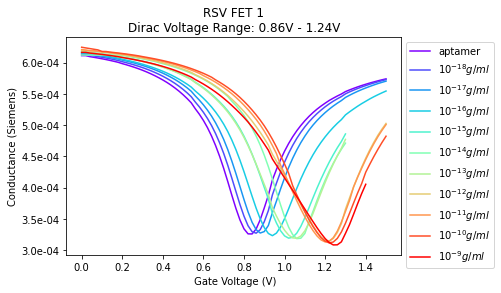

In [306]:
# plotting conductance vs gate voltage for single FET
device_number = 0
maxim = np.min(dataset.dirac_voltages[:,device_number])
minim = np.max(dataset.dirac_voltages[:,device_number])

x = [0.02*f for f in range(len(dataset.apt_conductances[device_number]))]
# cmap = plt.get_cmap('Blues')
cmap = plt.get_cmap('rainbow')
plt.plot(x, dataset.apt_conductances[device_number], color=cmap(0) , label='aptamer')

for j in range(dataset.num_concs):
    x = [0.02*f for f in range(len(dataset.conductances[j][device_number]))]
    y = dataset.conductances[j][device_number]
    plt.plot(x, y, color=cmap((j+1) / 10), label=rf'$10^{{{j-18}}} g/ml$')
plt.title(f'RSV FET 1\nDirac Voltage Range: {maxim}V - {minim}V')
plt.xlabel(" Gate Voltage (V)")
plt.ylabel("Conductance (Siemens)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_e))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
plt.close()

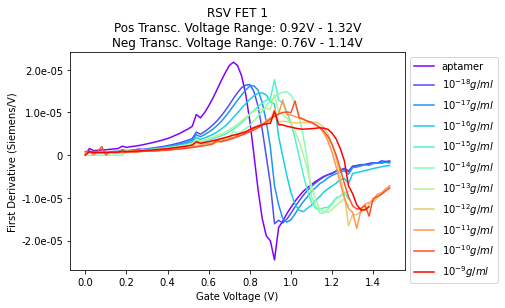

In [307]:
# plotting conductance derivative vs gate voltage for single FET
pos_maxim = np.max(dataset.pos_transc_voltages[:,0])
pos_minim = np.min(dataset.pos_transc_voltages[:,0])
neg_maxim = np.max(dataset.neg_transc_voltages[:,0])
neg_minim = np.min(dataset.neg_transc_voltages[:,0])

cmap = plt.get_cmap('rainbow')
x = [0.02*f for f in range(len(dataset.apt_conductance_derivatives[device_number]))]
plt.plot(x, dataset.apt_conductance_derivatives[device_number], color=cmap(0) , label='aptamer')

# conductance derivative shifts
for j in range(dataset.num_concs):
    y = dataset.conductance_derivatives[j][i]
    x = [0.02*f for f in range(len(y))]
    plt.plot(x, y, color=cmap((j+1) / 10), label=rf'$10^{{{j-18}}} g/ml$')
plt.title(f'RSV FET 1\nPos Transc. Voltage Range: {pos_minim}V - {pos_maxim}V\nNeg Transc. Voltage Range: {neg_minim}V - {neg_maxim}V')
plt.xlabel("Gate Voltage (V)")
plt.ylabel("First Derivative (Siemens/V)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_e))
plt.show()
plt.close()

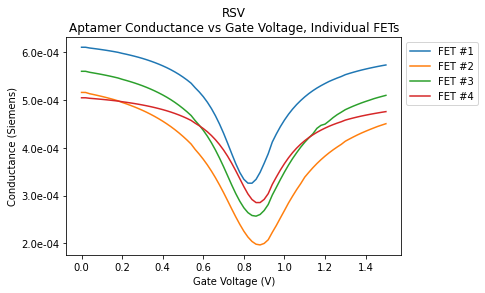

In [308]:
# plotting IV (GV) curve for aptamer data, all individual lines    

for dev_num in range(dataset.num_devices):
    y = dataset.apt_conductances[dev_num]
    x = [0.02*f for f in range(len(y))]
    plt.plot(x, y, label=f'FET #{dev_num+1}')
plt.title('RSV\nAptamer Conductance vs Gate Voltage, Individual FETs')
plt.xlabel("Gate Voltage (V)")
plt.ylabel("Conductance (Siemens)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_e))
plt.show()
plt.close()

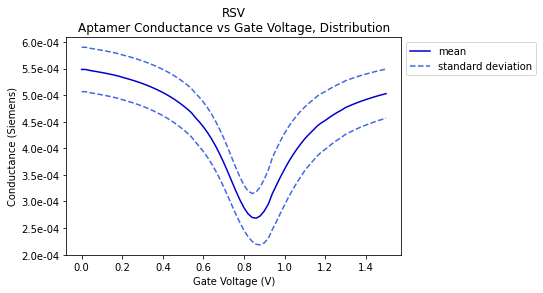

In [309]:
# plotting IV (GV) curve for aptamer data, the average, a single line with std devs
x = [0.02*f for f in range(len(dataset.apt_conductances[0]))]
y = []
std_dev = []
for v_idx in range(len(dataset.apt_conductances[0])):
    y.append(np.mean([dataset.apt_conductances[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))
    std_dev.append(np.std([dataset.apt_conductances[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))

plt.plot(x, y, label='mean', color='mediumblue')
plt.plot(x, [y[i]+std_dev[i] for i in range(len(y))], color='royalblue', linestyle='--')
plt.plot(x, [y[i]-std_dev[i] for i in range(len(y))], color='royalblue', linestyle='--', label='standard deviation')
    
plt.title('RSV\nAptamer Conductance vs Gate Voltage, Distribution')
plt.xlabel("Gate Voltage (V)")
plt.ylabel("Conductance (Siemens)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_e))
plt.show()
plt.close()

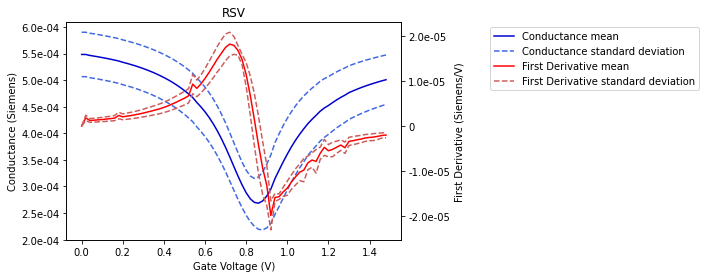

In [310]:
# plotting IV (GV) curve for aptamer data, the average, a single line with std devs
fig, ax1 = plt.subplots()
x = [0.02*f for f in range(len(dataset.apt_conductances[0]))]

y_cond = []
std_dev_cond = []
for v_idx in range(len(dataset.apt_conductances[0])):
    y_cond.append(np.mean([dataset.apt_conductances[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))
    std_dev_cond.append(np.std([dataset.apt_conductances[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))

y_transcond = []
std_dev_transcond = []
for v_idx in range(len(dataset.apt_conductance_derivatives[0])):
    y_transcond.append(np.mean([dataset.apt_conductance_derivatives[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))
    std_dev_transcond.append(np.std([dataset.apt_conductance_derivatives[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))

ax1.plot(x[:len(y_transcond)], y_cond[:len(y_transcond)], label='Conductance mean', color='mediumblue')
ax1.plot(x[:len(y_transcond)], [y_cond[i]+std_dev_cond[i] for i in range(len(y_cond))][:len(y_transcond)], color='royalblue', linestyle='--')
ax1.plot(x[:len(y_transcond)], [y_cond[i]-std_dev_cond[i] for i in range(len(y_cond))][:len(y_transcond)], color='royalblue', linestyle='--', label='Conductance standard deviation')
ax1.set_xlabel("Gate Voltage (V)")
ax1.set_ylabel("Conductance (Siemens)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_e))

ax2 = ax1.twinx()
ax2.plot(x[:len(y_transcond)], y_transcond, label='First Derivative mean', color='red')
ax2.plot(x[:len(y_transcond)], [y_transcond[i]+std_dev_transcond[i] for i in range(len(y_transcond))], color='indianred', linestyle='--')
ax2.plot(x[:len(y_transcond)], [y_transcond[i]-std_dev_transcond[i] for i in range(len(y_transcond))], color='indianred', linestyle='--', label='First Derivative standard deviation')
ax2.set_xlabel("Gate Voltage (V)")
ax2.set_ylabel("First Derivative (Siemens/V)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_e))

# Create a single legend with combined handles and labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.25, 1))

plt.title('RSV')
plt.show()
plt.close()

76
76


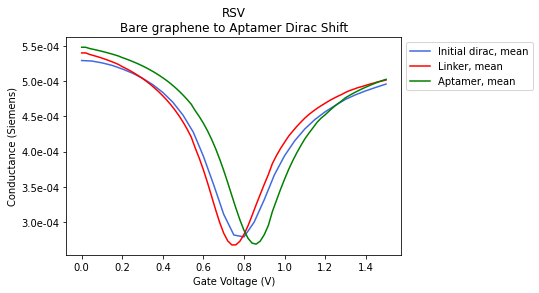

bare 0.775
linker 0.745
aptamer 0.86
bare -> linker, -0.03
linker -> aptamer, 0.115
bare -> aptamer, 0.085


In [344]:
# plotting IV (GV) curve for aptamer vs bare grapheen data using the average for each, a single line with std devs

# IV curve for initial dirac data
x_id = [0.05*f for f in range(len(dataset.id_conductances[0]))]
y_id = []
std_dev_id = []
for v_idx in range(len(dataset.id_conductances[0])):
    y_id.append(np.mean([dataset.id_conductances[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))
    std_dev_id.append(np.std([dataset.id_conductances[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))
plt.plot(x_id, y_id, label='Initial dirac, mean', color='royalblue')
# plt.plot(x_id, [y_id[i]+std_dev_id[i] for i in range(len(y_id))], color='limegreen', linestyle='--')
# plt.plot(x_id, [y_id[i]-std_dev_id[i] for i in range(len(y_id))], color='limegreen', linestyle='--', label='Bare graphene standard deviation')

# IV curve for linker data
x_linker = [0.02*f for f in range(len(dataset.linker_conductances[0]))]
print(len(dataset.linker_conductances[0]))
y_linker = []
std_dev_linker = []
for v_idx in range(len(dataset.linker_conductances[0])):
    y_linker.append(np.mean([dataset.linker_conductances[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))
    std_dev_linker.append(np.std([dataset.linker_conductances[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))
plt.plot(x_linker, y_linker, label='Linker, mean', color='red')
# plt.plot(x_linker, [y_linker[i]+std_dev_linker[i] for i in range(len(y_linker))], color='limegreen', linestyle='--')
# plt.plot(x_linker, [y_linker[i]-std_dev_linker[i] for i in range(len(y_linker))], color='limegreen', linestyle='--', label='Bare graphene standard deviation')

# IV curve for aptamer data
x_apt = [0.02*f for f in range(len(dataset.apt_conductances[0]))]
print(len(dataset.apt_conductances[0]))
y_apt = []
std_dev_apt = []
for v_idx in range(len(dataset.apt_conductances[0])):
    y_apt.append(np.mean([dataset.apt_conductances[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))
    std_dev_apt.append(np.std([dataset.apt_conductances[dev_num][v_idx] for dev_num in range(dataset.num_devices)]))
plt.plot(x_apt, y_apt, label='Aptamer, mean', color='green')
# plt.plot(x_apt, [y_apt[i]+std_dev_apt[i] for i in range(len(y_apt))], color='royalblue', linestyle='--')
# plt.plot(x_apt, [y_apt[i]-std_dev_apt[i] for i in range(len(y_apt))], color='royalblue', linestyle='--', label='Aptamer standard deviation')

plt.title('RSV\nBare graphene to Aptamer Dirac Shift')
plt.xlabel("Gate Voltage (V)")
plt.ylabel("Conductance (Siemens)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_e))
plt.show()
plt.close()

id_avg_dirac, linker_avg_dirac, apt_avg_dirac = round(np.mean(list(dataset.id_dirac_voltages.values())), 3), round(np.mean(list(dataset.linker_dirac_voltages.values())), 3), round(np.mean(list(dataset.apt_dirac_voltages.values())), 3)

print('bare', id_avg_dirac)
print('linker', linker_avg_dirac)
print('aptamer', apt_avg_dirac)
print(f'bare -> linker, {round(linker_avg_dirac - id_avg_dirac, 3)}')
print(f'linker -> aptamer, {round(apt_avg_dirac - linker_avg_dirac, 3)}')
print(f'bare -> aptamer, {round(apt_avg_dirac - id_avg_dirac, 3)}')